In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/world-data-2023-updated.csv'
data = pd.read_csv(file_path)

# Display the summary of the dataset to understand the missing values and data types
data.info()

# Handling missing values
# Fill numeric missing values with the median of the column
data.fillna(data.median(numeric_only=True), inplace=True)

# Fill or drop any remaining categorical missing values
data.dropna(inplace=True)

# Convert percentage strings to numeric values
data['Agricultural Land( %)'] = data['Agricultural Land( %)'].str.rstrip('%').astype('float') / 100.0
data['Out of pocket health expenditure'] = data['Out of pocket health expenditure'].str.rstrip('%').astype('float') / 100.0
data['Population: Labor force participation (%)'] = data['Population: Labor force participation (%)'].str.rstrip('%').astype('float') / 100.0
data['Tax revenue (%)'] = data['Tax revenue (%)'].str.rstrip('%').astype('float') / 100.0
data['Total tax rate'] = data['Total tax rate'].str.rstrip('%').astype('float') / 100.0
data['Unemployment rate'] = data['Unemployment rate'].str.rstrip('%').astype('float') / 100.0

# Convert 'Co2-Emissions' and 'Population' to numeric values
data['Co2-Emissions'] = data['Co2-Emissions'].str.replace(',', '').astype('float')
data['Population'] = data['Population'].str.replace(',', '').astype('float')
data['Urban_population'] = data['Urban_population'].str.replace(',', '').astype('float')

# Remove unnecessary columns
columns_to_remove = ['Country', 'Abbreviation', 'Capital/Major City', 'Calling Code', 'Latitude', 'Longitude']
data.drop(columns=columns_to_remove, inplace=True)

# Feature Engineering
# Create new feature: CO2 Emissions per Capita
data['Co2-Emissions-per-Capita'] = data['Co2-Emissions'] / data['Population']

# Create new feature: Urban Population Percentage
data['Urban_population_percentage'] = data['Urban_population'] / data['Population']

# Display the first few rows of the cleaned data
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    110 non-null    object 
 1   Density
(P/Km2)                            110 non-null    object 
 2   Abbreviation                               110 non-null    object 
 3   Agricultural Land( %)                      110 non-null    object 
 4   Land Area(Km2)                             110 non-null    object 
 5   Armed Forces size                          110 non-null    object 
 6   Birth Rate                                 110 non-null    float64
 7   Calling Code                               110 non-null    float64
 8   Capital/Major City                         110 non-null    object 
 9   Co2-Emissions                              110 non-null    object 
 10  CPI                       

Density\n(P/Km2)  Agricultural Land( %) Land Area(Km2) Armed Forces size  \
0               60                  0.581        652,230           323,000   
1              105                  0.431         28,748             9,000   
2               18                  0.174      2,381,741           317,000   
3               26                  0.475      1,246,700           117,000   
4               17                  0.543      2,780,400           105,000   

   Birth Rate  Co2-Emissions     CPI CPI Change (%) Currency-Code  \
0       32.49         8672.0   149.9          2.30%           AFN   
1       11.78         4536.0  119.05          1.40%           ALL   
2       24.28       150006.0  151.36          2.00%           DZD   
3       40.73        34693.0  261.73         17.10%           AOA   
4       17.02       201348.0  232.75         53.50%           ARS   

   Fertility Rate  ... Public Transportation Usage Waste Generation  \
0            4.47  ...                    0.121911        23.491942   
1            1.62  ...                    0.600194        67.353328   
2            3.02  ...                    0.132868         2.461199   
3            5.52  ...                    0.308237        10.858804   
4            2.26  ...                    0.568242        80.091650   

  Industrial Emissions Agricultural Emissions Deforestation Rate  \
0           799.435937              29.015554           0.021883   
1           694.727001             484.554405           0.023118   
2           272.217923             441.904564           0.009018   
3           590.271644             463.883366           0.039946   
4           361.037800             497.454421           0.034990   

   Energy Efficiency Urbanization Rate  Climate Policies  \
0         131.080585          0.463792                 0   
1          88.176893          0.512477                 0   
2         437.173948          0.491077                 1   
3         117.414854          0.633491                 0   
4         488.173975          0.211721                 1   

   Co2-Emissions-per-Capita Urban_population_percentage  
0                  0.000228                     0.25754  
1                  0.001589                     0.61229  
2                  0.003484                     0.73189  
3                  0.001090                     0.66177  
4                  0.004481                     0.91991  

[5 rows x 46 columns]

ValueError: num must be an integer with 1 <= num <= 35, not 36

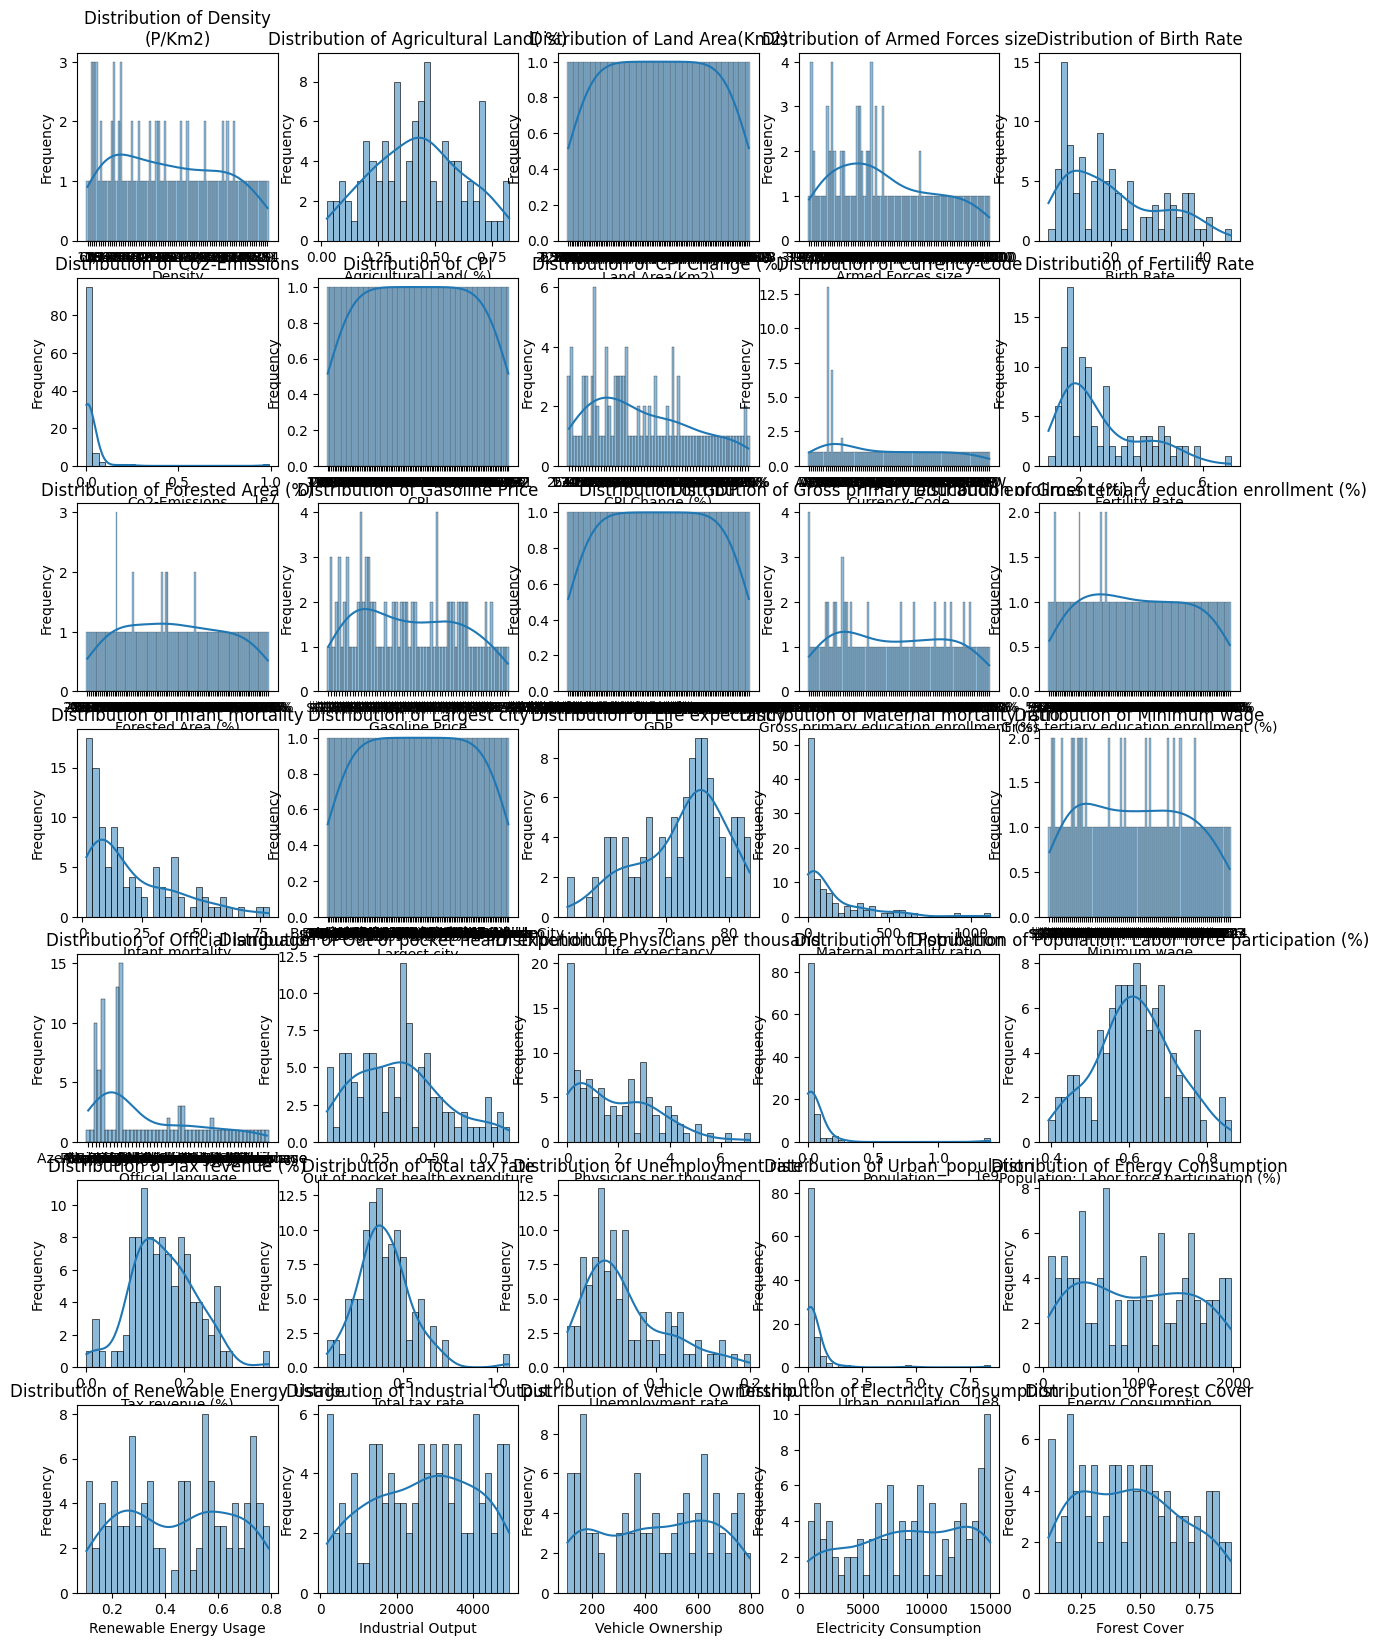

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 20))

# Loop through each column and create a subplot
for i, column in enumerate(data.columns, 1):
    plt.subplot(7, 5, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics of all columns
print(data.describe())

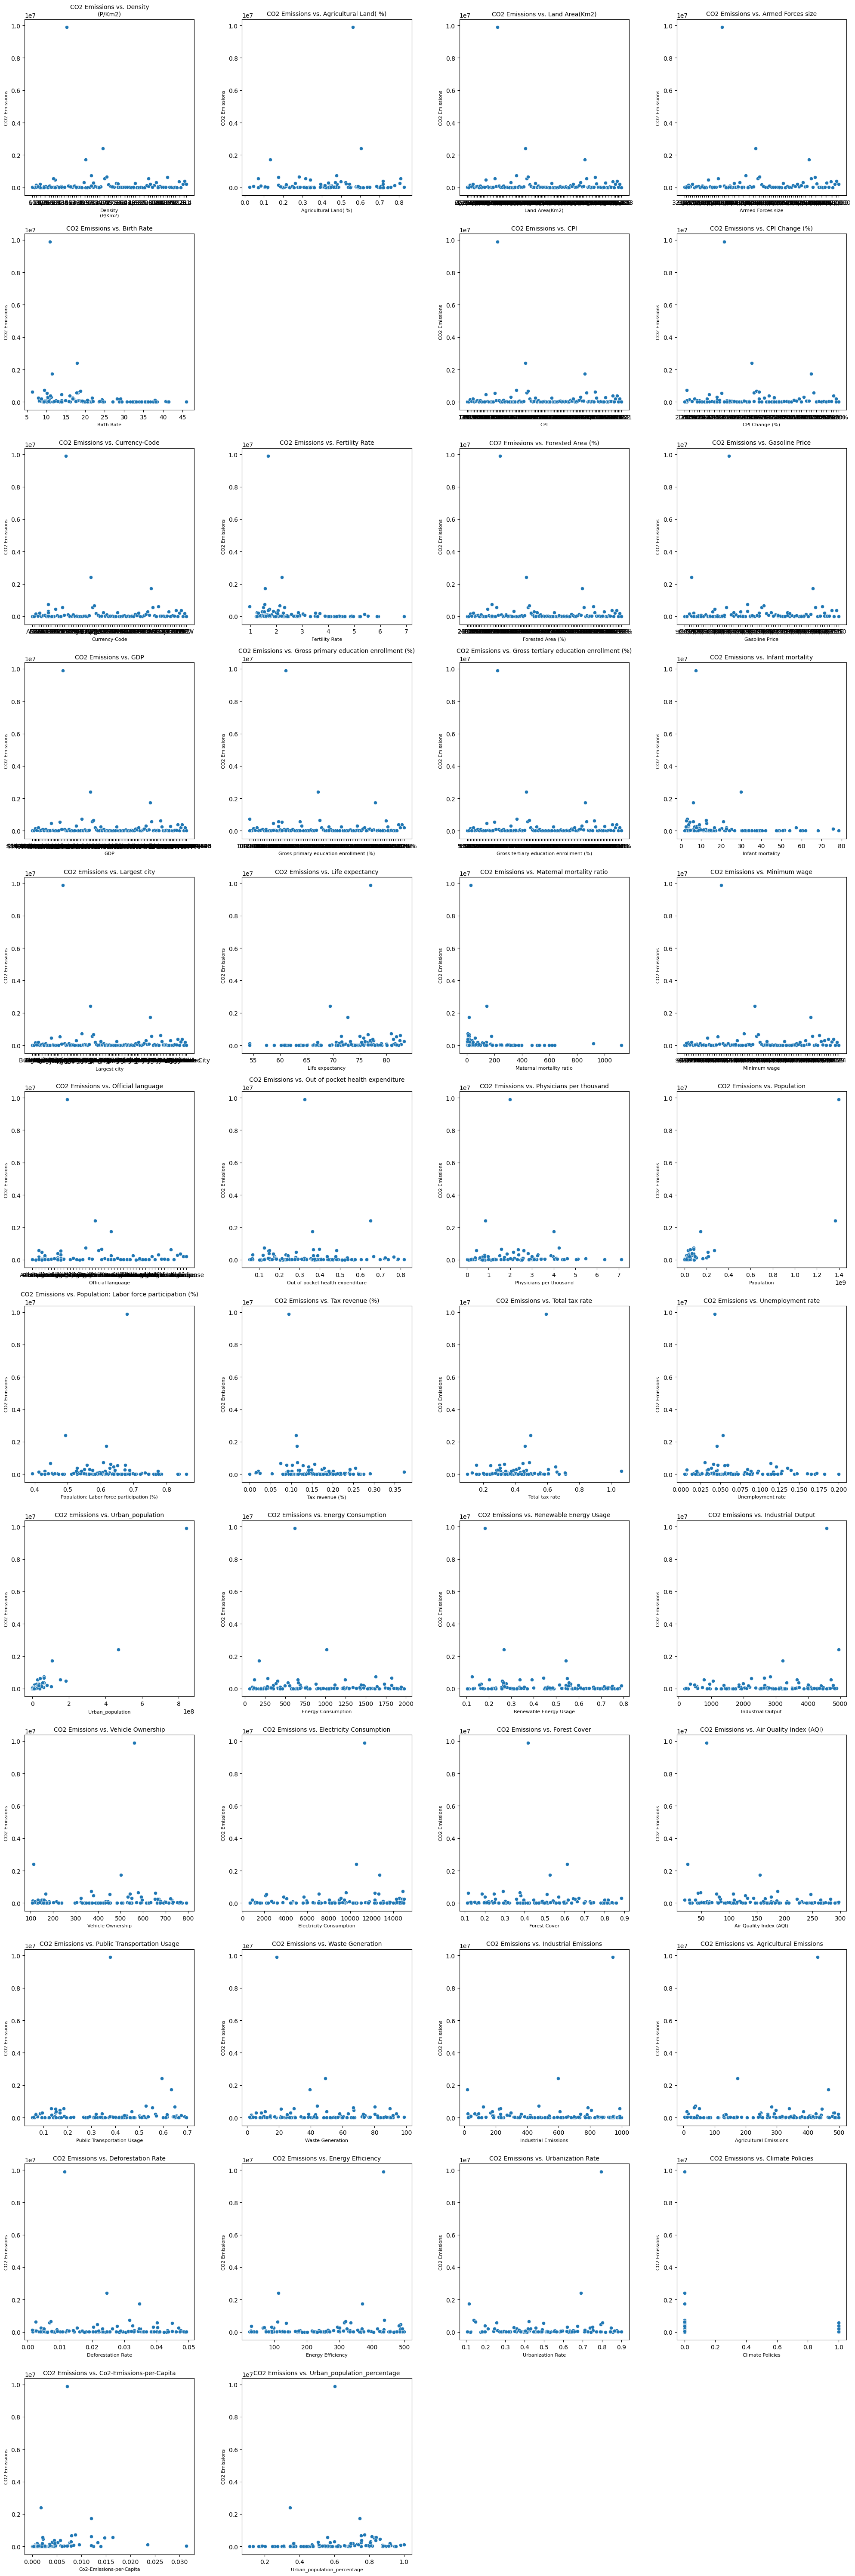

In [4]:
# Bivariate Analysis
# Scatter plots of CO2 Emissions with all other variables
num_vars = len(data.columns)
cols = 4
rows = (num_vars - 1 + cols - 1) // cols

plt.figure(figsize=(20, 5 * rows))

for i, column in enumerate(data.columns):
    if column != 'Co2-Emissions':
        plt.subplot(rows, cols, i + 1)
        sns.scatterplot(x=data[column], y=data['Co2-Emissions'])
        plt.title(f'CO2 Emissions vs. {column}', fontsize=10)
        plt.xlabel(column, fontsize=8)
        plt.ylabel('CO2 Emissions', fontsize=8)

plt.tight_layout()
plt.show()


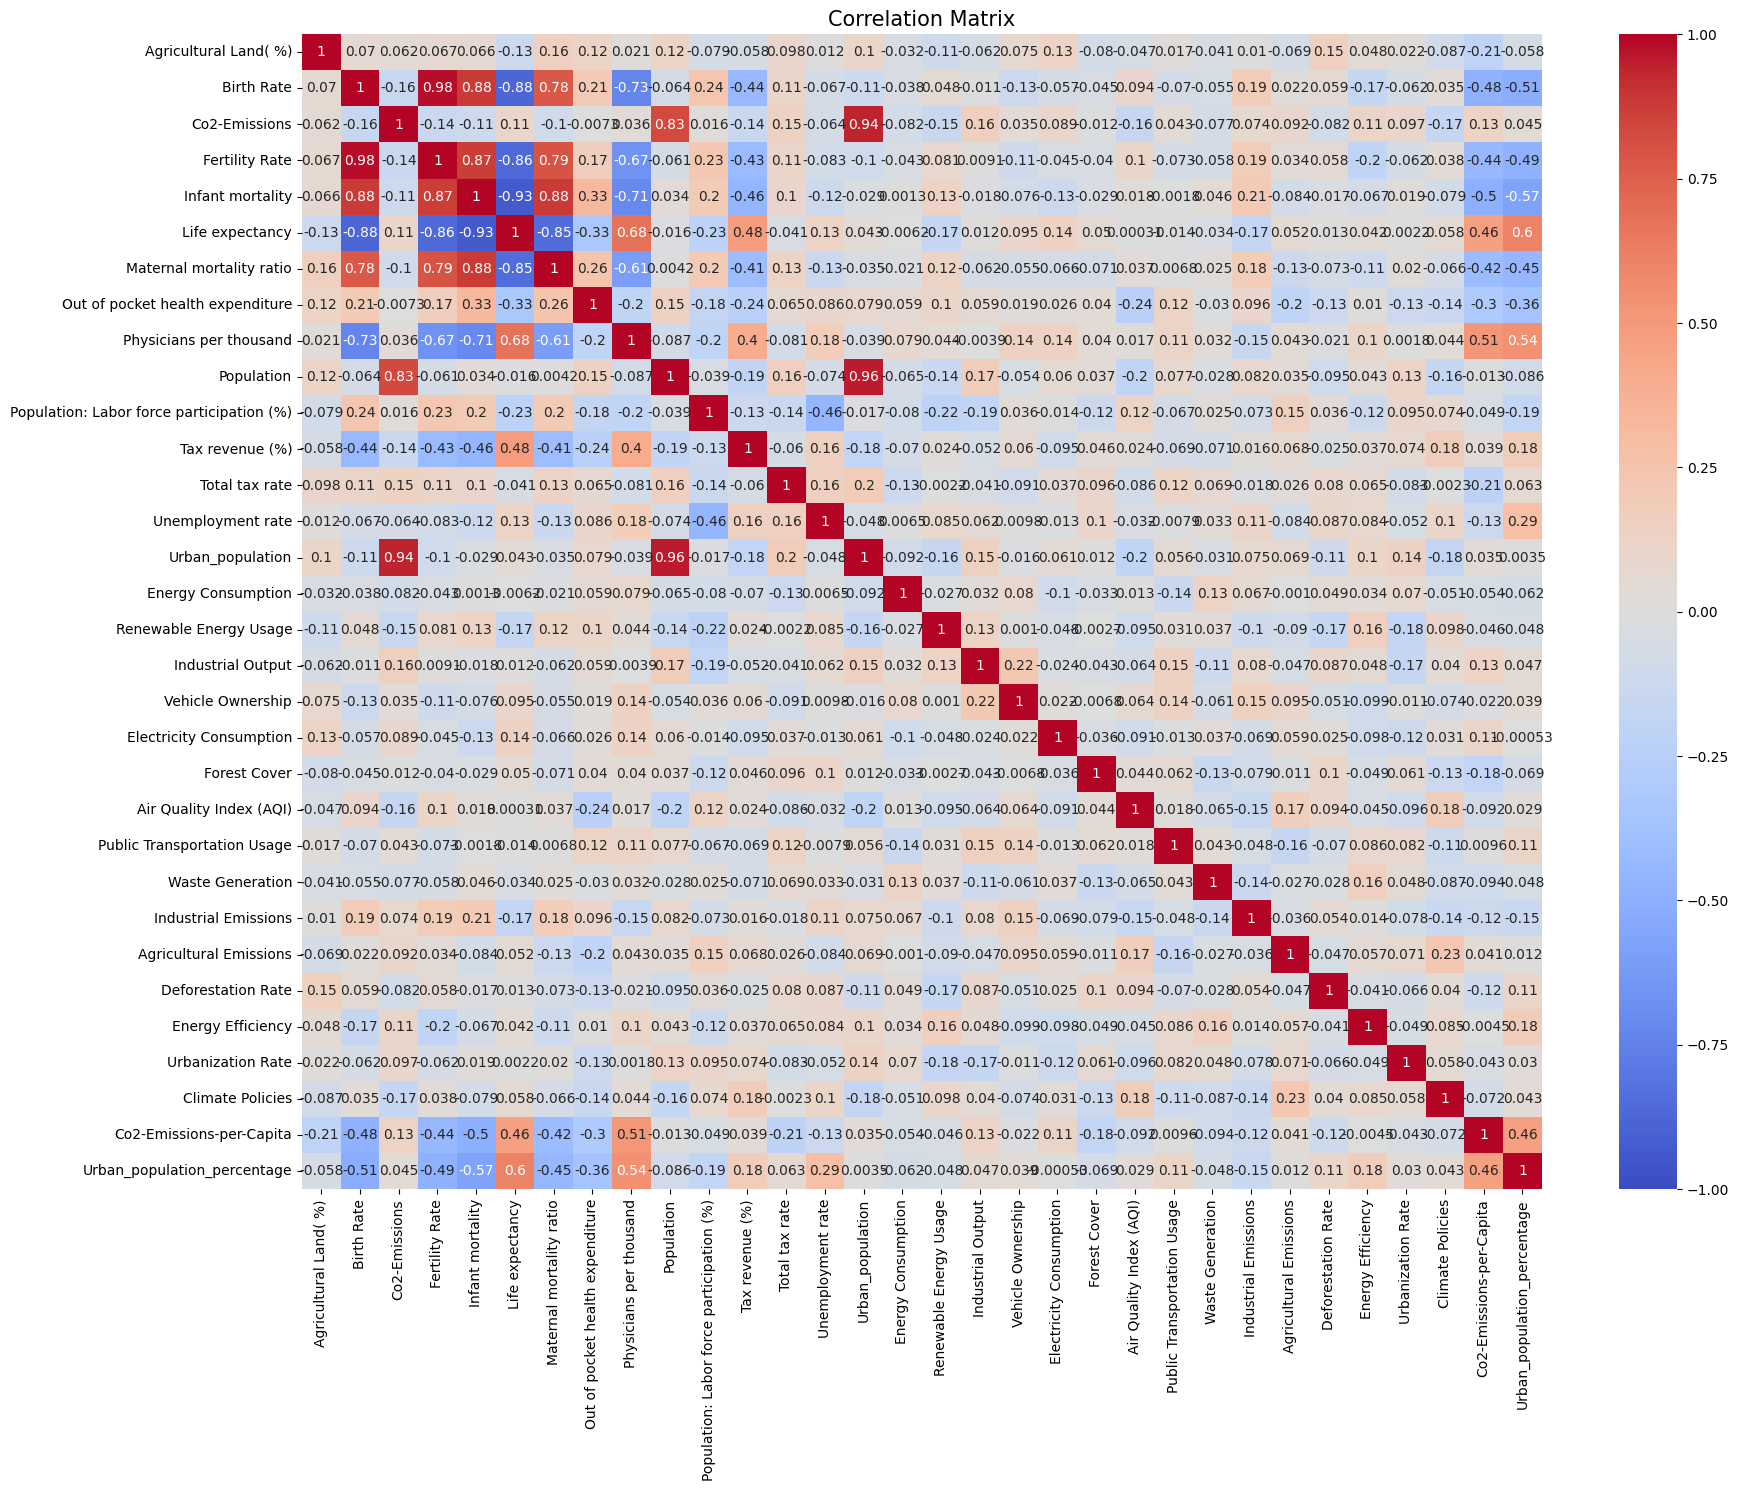

In [5]:
# Multivariate Analysis
# Pairplot for all variables
sns.pairplot(data)
plt.show()

# Correlation matrix
plt.figure(figsize=(20, 15))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns for correlation matrix
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=15)
plt.show()


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Verify all columns are numeric before proceeding
print("Column data types after conversion:")
print(data.dtypes)

# Check for non-numeric columns again
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns after conversion:", non_numeric_columns)

# Drop any remaining non-numeric columns that could not be converted
data.drop(columns=non_numeric_columns, inplace=True)

# Prepare the data for modeling
X = data.drop(columns=['Co2-Emissions'])
y = data['Co2-Emissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)
print("Linear Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin_reg))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lin_reg))
print("R^2 Score:", r2_score(y_test, y_pred_lin_reg))

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
print("\nDecision Tree Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_tree))
print("R^2 Score:", r2_score(y_test, y_pred_tree))

# Random Forest Regression
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)
print("\nRandom Forest Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_forest))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_forest))
print("R^2 Score:", r2_score(y_test, y_pred_forest))

# Gradient Boosting Regression
gbm_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_reg.fit(X_train, y_train)
y_pred_gbm = gbm_reg.predict(X_test)
print("\nGradient Boosting Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gbm))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gbm))
print("R^2 Score:", r2_score(y_test, y_pred_gbm))

# Support Vector Regression
svr_reg = SVR()
svr_reg.fit(X_train_scaled, y_train)
y_pred_svr = svr_reg.predict(X_test_scaled)
print("\nSupport Vector Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))
print("R^2 Score:", r2_score(y_test, y_pred_svr))

# Neural Network Regression
nn_reg = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

nn_reg.compile(optimizer='adam', loss='mse')

# Train the model
history = nn_reg.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

# Predict and evaluate the model
y_pred_nn = nn_reg.predict(X_test_scaled).flatten()
print("\nNeural Network Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_nn))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_nn))
print("R^2 Score:", r2_score(y_test, y_pred_nn))

Column data types after conversion:
Density\n(P/Km2)                              object
Agricultural Land( %)                        float64
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Co2-Emissions                                float64
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       object
Infant mortality                             float64
Largest city                                  object
Life expectancy                              float64
Maternal m